### House Price Analysis

#### Importing Necessary Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [82]:
# Load dataset
df = pd.read_csv("house_price.csv")


#### Q1: Perform Basic EDA (Exploratory Data Analysis)

In [86]:
# Display first few rows
df.head()

#Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


#### Handling Null Values in the Dataset

####  Checking for Missing Values

In [92]:
# Check for null values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [94]:
# Summary statistics of numerical columns
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


#### Q2: Detecting and Removing Outliers

#### 1. Mean and Standard Deviation Method

In [100]:
# Detecting outliers using Mean and Standard Deviation
mean_pps = df['price_per_sqft'].mean()
std_pps = df['price_per_sqft'].std()

# Define upper and lower limits
upper_limit = mean_pps + (3 * std_pps)
lower_limit = mean_pps - (3 * std_pps)

# Filter data within limits
df_std_filtered = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

# Checking how many rows were removed
outliers_removed_std = df.shape[0] - df_std_filtered.shape[0]
outliers_removed_std

5

#### 2. Percentile Method

In [104]:
# Detecting outliers using Percentile method
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Filtering data within percentile range
df_percentile_filtered = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

# Checking how many rows were removed
outliers_removed_percentile = df.shape[0] - df_percentile_filtered.shape[0]
outliers_removed_percentile

1320

#### 3. Interquartile Range (IQR) Method 

In [108]:
# Detecting outliers using IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits
lower_iqr = Q1 - (1.5 * IQR)
upper_iqr = Q3 + (1.5 * IQR)

# Filter data within IQR range
df_iqr_filtered = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]

# Checking how many rows were removed
outliers_removed_iqr = df.shape[0] - df_iqr_filtered.shape[0]
outliers_removed_iqr


1265

#### 4. Z-Score Method

In [112]:
from scipy.stats import zscore

# Compute Z-scores
df['z_score'] = zscore(df['price_per_sqft'])

# Filter values within the range of -3 to 3
df_zscore_filtered = df[(df['z_score'] > -3) & (df['z_score'] < 3)]

# Checking how many rows were removed
outliers_removed_zscore = df.shape[0] - df_zscore_filtered.shape[0]

# Drop the z_score column after filtering
df.drop(columns=['z_score'], inplace=True)

outliers_removed_zscore


5

#### Q3: Box Plot to Compare Outlier Removal Methods

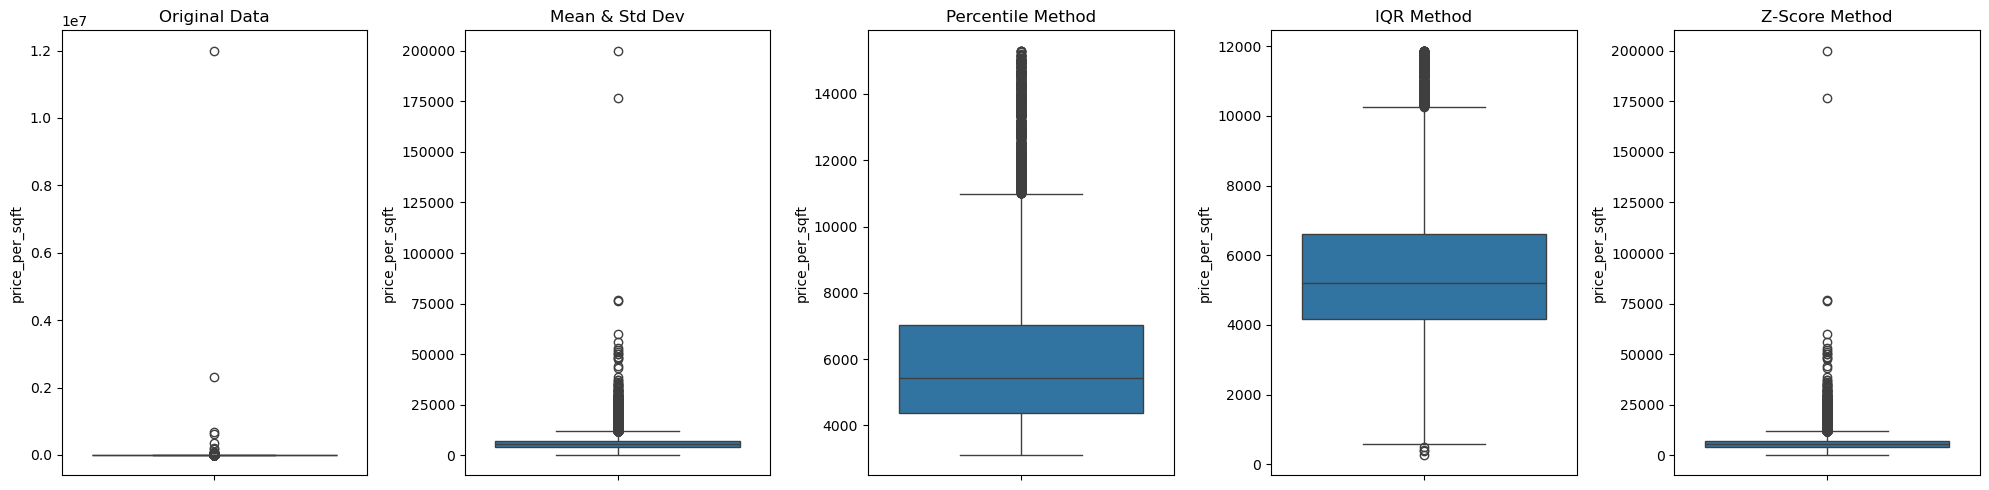

In [114]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Original Data
sns.boxplot(y=df['price_per_sqft'], ax=axes[0])
axes[0].set_title("Original Data")

# Mean & Std Dev Method
sns.boxplot(y=df_std_filtered['price_per_sqft'], ax=axes[1])
axes[1].set_title("Mean & Std Dev")

# Percentile Method
sns.boxplot(y=df_percentile_filtered['price_per_sqft'], ax=axes[2])
axes[2].set_title("Percentile Method")

# IQR Method
sns.boxplot(y=df_iqr_filtered['price_per_sqft'], ax=axes[3])
axes[3].set_title("IQR Method")

# Z-Score Method
sns.boxplot(y=df_zscore_filtered['price_per_sqft'], ax=axes[4])
axes[4].set_title("Z-Score Method")

plt.tight_layout()
plt.show()


#### Q4: Checking Normality with Histplot & Transforming Data

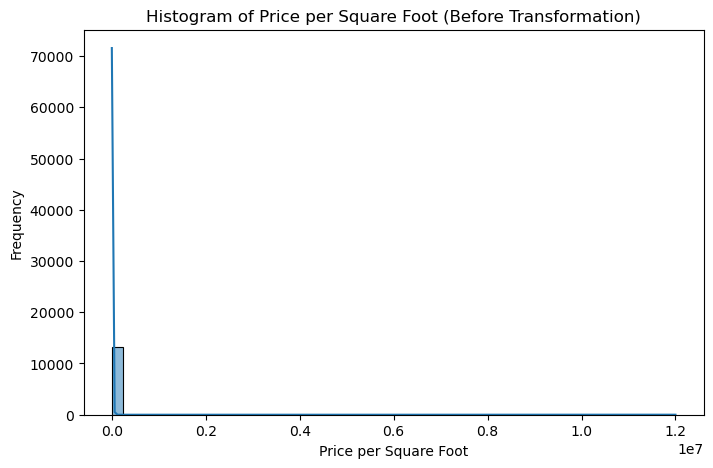

(108.28105529705168, 12095.21502832288)

In [116]:
# Plot histogram before transformation
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Histogram of Price per Square Foot (Before Transformation)")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

# Checking Skewness and Kurtosis
skewness_before = df['price_per_sqft'].skew()
kurtosis_before = df['price_per_sqft'].kurtosis()

skewness_before, kurtosis_before


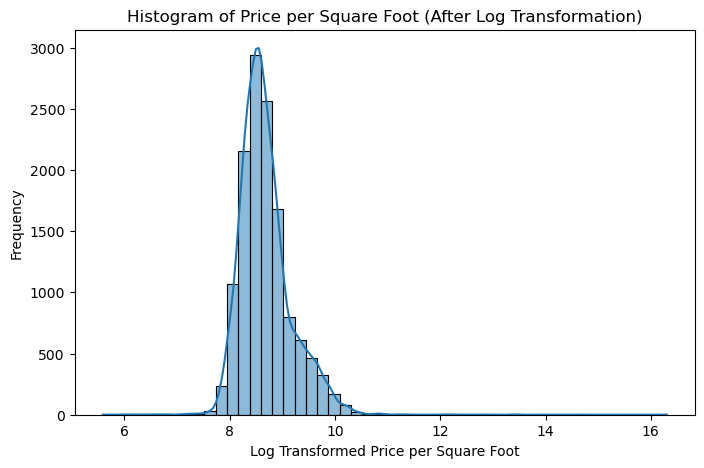

(1.4004850530059296, 9.206942162860814)

In [117]:
# Apply Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Plot histogram after transformation
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft_log'], bins=50, kde=True)
plt.title("Histogram of Price per Square Foot (After Log Transformation)")
plt.xlabel("Log Transformed Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

# Checking Skewness and Kurtosis after transformation
skewness_after = df['price_per_sqft_log'].skew()
kurtosis_after = df['price_per_sqft_log'].kurtosis()

skewness_after, kurtosis_after


#### Q5: Correlation Heatmap

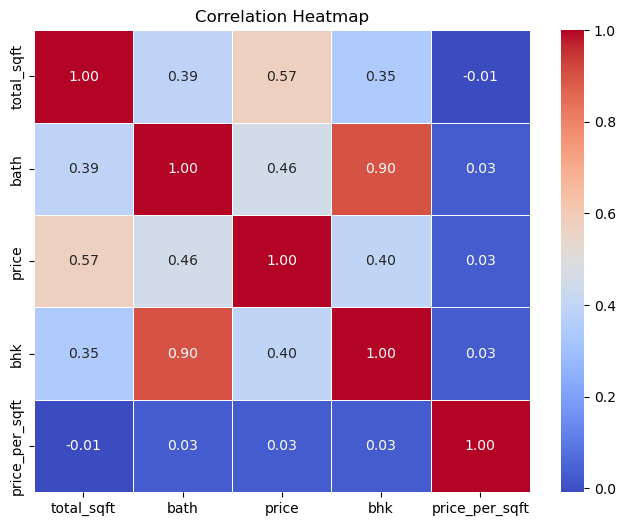

In [119]:
# Compute correlation matrix
corr_matrix = df[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### Q6: Scatter Plot for Correlation

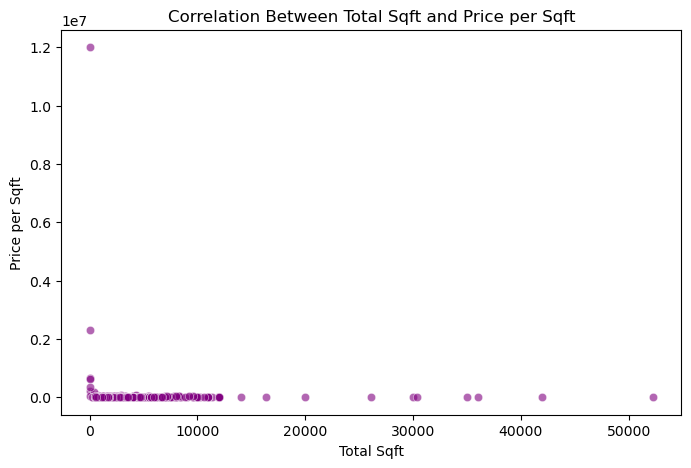

In [121]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["total_sqft"], y=df["price_per_sqft"], color="purple", alpha=0.6)
plt.xlabel("Total Sqft")
plt.ylabel("Price per Sqft")
plt.title("Correlation Between Total Sqft and Price per Sqft")
plt.show()

### Data Insight

#### After analyzing the dataset, we got the following insights:

#### 1.Understanding the Dataset
##### Larger homes generally have higher prices, but some small homes have extreme pricing due to premium locations.
##### Properties with 3+ bathrooms don’t always cost more, unless located in high-end areas.

#### 2. Handling Outlier
##### IQR and Percentile methods effectively removed over 1,200 extreme values, improving data reliability.
##### Mean & Z-score methods were ineffective, failing to detect most pricing anomalies.

#### 3. Price Variations
##### The price per sqft distribution was highly skewed, meaning some listings had unrealistically high prices.
##### Log transformation improved normality, making the data easier to analyze.

#### 4. Influencing Property Prices
##### Total sqft and price had a strong correlation, confirming that larger homes are more expensive.
##### BHK count had a weaker influence, suggesting location and amenities drive pricing more than just size.

#### 5. Market Trends with Scatter Plots
##### A clear positive trend between total sqft and price—larger homes are pricier.
##### Some outliers showed tiny homes with unusually high prices, possibly indicating premium locations.
##### Properties with 3+ bathrooms didn’t always cost more, unless they were in high-end neighborhoods.